In [1]:
# 구글 드라이브 연결
from google.colab import drive
drive.mount('/content/dirve')

Mounted at /content/dirve


In [4]:
# 기본 셋팅
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style = 'whitegrid', color_codes = True)

filenames = [
    os.path.join("/content/dirve/MyDrive/김태우/대학교/2학년 2학기/데이터마이닝/code/TitanicExcersise_data", filename)
    for filename in os.listdir("/content/dirve/MyDrive/김태우/대학교/2학년 2학기/데이터마이닝/code/TitanicExcersise_data")
    if filename.endswith('csv')
]
filenames

['/content/dirve/MyDrive/김태우/대학교/2학년 2학기/데이터마이닝/code/TitanicExcersise_data/train.csv',
 '/content/dirve/MyDrive/김태우/대학교/2학년 2학기/데이터마이닝/code/TitanicExcersise_data/test.csv']

train과 test 파일의 열제목의 의미

*   PassengerId : 탑승객의 고유 아이디
*   Survival : 생존여부(0: 사망, 1: 생존)항목 추가
*   Pclass : 등실의 등급(1: 1등급, 2: 2등급, 3: 3등급)
*   Name : 이름
*   Sex : 성별
*   Age : 나이
*   Sibsp : 함께 탑승한 형제자매, 아내 남편의 수
*   Parch: 함께 탑승한 부모, 자식의 수
*   Ticket: 티켓번호
*   Fare: 티켓의 요금
*   Cabin: 객실번호
*   Embarked: 배에 탑승한 위치(C = Cherbourg, Q = Queenstown, S = Southampton)항목 추가

In [5]:
# 데이터프레임을 각 파일에서 읽어온 후 df_list에 추가
df_list = [pd.read_csv(filename) for filename in filenames]

# 두 개의 데이터프레임을 하나로 통합
df = pd.concat(df_list, sort = False)

# 인덱스 초기화
df = df.reset_index(drop = True)

# 결과 출력
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# train.csv 데이터 수
number_of_train_dataset = df.Survived.notnull().sum()

# test.csv 데이터 수
number_of_test_dataset = df.Survived.isnull().sum()

# train.csv 데이터의 y 값 추출
y_true = df.pop("Survived")[:number_of_train_dataset] # pop함수는 원래 있던 열을 꺼내는 함수이기 때문에 실행시키면 원본 데이터에서 삭제됨
df.head(2).T

,0,1
PassengerId,1,2
Pclass,3,1
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th..."
Sex,male,female
Age,22.0,38.0
SibSp,1,1
Parch,0,0
Ticket,A/5 21171,PC 17599
Fare,7.25,71.2833
Cabin,NaN,C85


In [7]:
# 데이터를 소수점 두 번째 자리까지 출력
pd.options.display.float_format = '{:.2f}'.format

# 결측치 값의 합을 데이터의 개수로 나눠 비율로 출력
df.isnull().sum() / len(df) * 100

PassengerId    0.00
Pclass         0.00
Name           0.00
Sex            0.00
Age           20.09
SibSp          0.00
Parch          0.00
Ticket         0.00
Fare           0.08
Cabin         77.46
Embarked       0.15
dtype: float64

In [8]:
# df 데이터프레임에서 Age 열의 널 값이 아닌 값들만 뽑아 Pclass 기준으로 그룹화 해준 후 Age의 평균을 출력
df[df["Age"].notnull()].groupby(["Pclass"])["Age"].mean()

Pclass
1   39.16
2   29.51
3   24.82
Name: Age, dtype: float64

In [9]:
# df 데이터프레임에서 Age열의 NaN 값들을 Pclass 기준으로 그룹화 해준 후 Age의 평균으로 값을 넣어줌
df["Age"].fillna(
    df.groupby("Pclass")["Age"].transform("mean"), inplace = True
)
df.isnull().sum() / len(df) * 100

PassengerId    0.00
Pclass         0.00
Name           0.00
Sex            0.00
Age            0.00
SibSp          0.00
Parch          0.00
Ticket         0.00
Fare           0.08
Cabin         77.46
Embarked       0.15
dtype: float64

In [10]:
# Embarked 열의 널 값을 S로 변환
df.loc[61, "Embarked"] = "S"
df.loc[829, "Embarked"] = "S"
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1309 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1309 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


In [11]:
# 범주형 데이터와 수치형 데이터를 구분해서 타입지정
object_columns = ["PassengerId", "Pclass", "Name", "Sex", "Ticket", "Cabin", "Embarked"]
numeric_columns = ["Age", "SibSp", "Parch", "Fare"]

for col_name in object_columns:
    df[col_name] = df[col_name].astype(object)
for col_name in numeric_columns:
    df[col_name] = df[col_name].astype(float)

df["Parch"] = df["Parch"].astype(int)
df["SibSp"] = df["SibSp"].astype(int)

df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,24.82,0,0,A.5. 3236,8.05,NaN,S
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00,0,0,PC 17758,108.90,C105,C
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50,0,0,SOTON/O.Q. 3101262,7.25,NaN,S
1307,1308,3,"Ware, Mr. Frederick",male,24.82,0,0,359309,8.05,NaN,S


In [12]:
# 병합하는 함수 정의
def merge_and_get(ldf, rdf, on, how = "inner", index = None):
    if index is True:
      return pd.merge(ldf, rdf, how = how, left_index = True, right_index = True)
    else:
      return pd.merge(ldf, rdf, how = how, on = on)

In [13]:
# 원 핫 인코딩
one_hot_df = merge_and_get(
    df, pd.get_dummies(df["Sex"], prefix = "Sex"), on = None, index = True
)
one_hot_df = merge_and_get(
    one_hot_df, pd.get_dummies(df["Pclass"], prefix = "Pclass"), on = None, index = True
)
one_hot_df = merge_and_get(
    one_hot_df, pd.get_dummies(df["Embarked"], prefix = "Embarked"), on = None, index = True
)
one_hot_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S,0,1,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C,1,0,1,0,0,1,0,0
2,3,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S,1,0,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S,1,0,1,0,0,0,0,1
4,5,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,24.82,0,0,A.5. 3236,8.05,NaN,S,0,1,0,0,1,0,0,1
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00,0,0,PC 17758,108.90,C105,C,1,0,1,0,0,1,0,0
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50,0,0,SOTON/O.Q. 3101262,7.25,NaN,S,0,1,0,0,1,0,0,1
1307,1308,3,"Ware, Mr. Frederick",male,24.82,0,0,359309,8.05,NaN,S,0,1,0,0,1,0,0,1


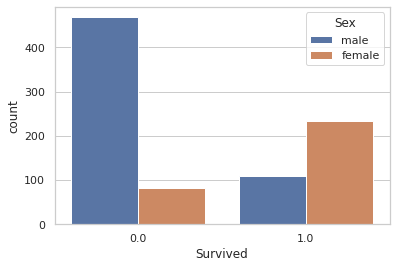

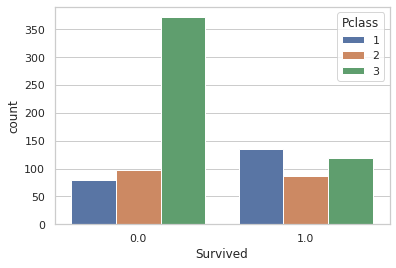

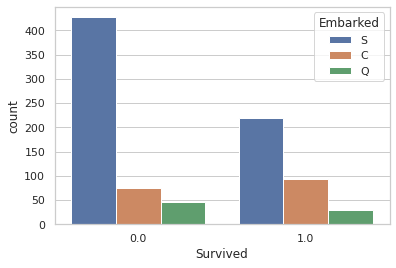

In [14]:
# 성별, 객실 등급, 배에 탄 지역에 따라 생존율을 시각화
temp_columns = ["Sex", "Pclass", "Embarked"]

for col_name in temp_columns:
    temp_df = pd.merge(
        one_hot_df[col_name], y_true, left_index = True, right_index = True
    )
    sns.countplot(x = "Survived", hue = col_name, data = temp_df)
    plt.show()

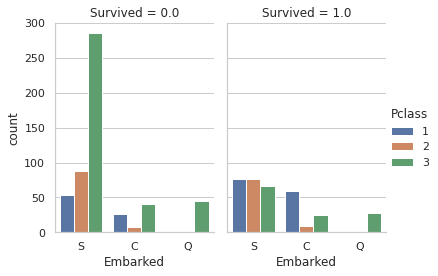

In [15]:
# 배에 탑승한 위치에 따라 그리고 객실 등급에 따라 생존율 시각화
temp_df = pd.merge(one_hot_df[temp_columns],
                   y_true, left_index = True,
                   right_index = True)
g = sns.catplot(x = "Embarked",
                hue = "Pclass",
                col = "Survived",
                data = temp_df,
                kind = "count",
                height = 4, aspect = .7)

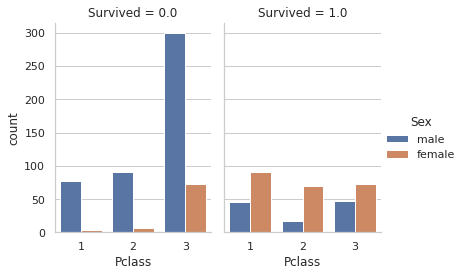

In [16]:
# 성별과 객실 등급에 따라 생존율 시각화
temp_df = pd.merge(
    one_hot_df[temp_columns], 
    y_true, left_index = True,
    right_index = True
)

g = sns.catplot(x = "Pclass",
                hue = "Sex", col = "Survived",
                data = temp_df, kind = "count",
                height = 4, aspect = .7)

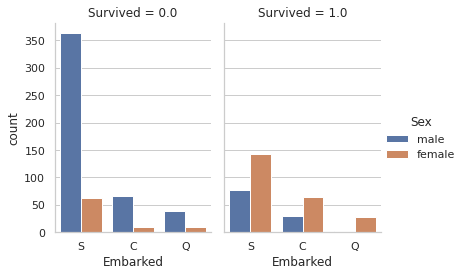

In [17]:
# 성별과 배에 탄 위치에 따라 생존율 시각화
temp_df = pd.merge(
    one_hot_df[temp_columns],
    y_true, left_index = True,
    right_index = True
)

g = sns.catplot(
    x = "Embarked", hue = "Sex",
    col = "Survived",
    data = temp_df, kind = "count",
    height = 4, aspect = .7
)

아래 코드는 상관분석(Correlation Analysis)은 두 변수간에 어떤 선형적인 관계를 
가지고 있는지를 분석하는 방법입니다. 이때 두 변수간의 관계의 강도를 상관관계(Correlation coefficient)라고 합니다.

상관계수는 두 변수간의 연관된 정도만 나타낼 뿐 원인 결과를 나타내는 인과관계를 설명하는 것은 아님을 반드시 알아야합니다.

상관관계 분석에서는 기본적 방법으로 피어슨 상관계수를 많이 이용합니다.

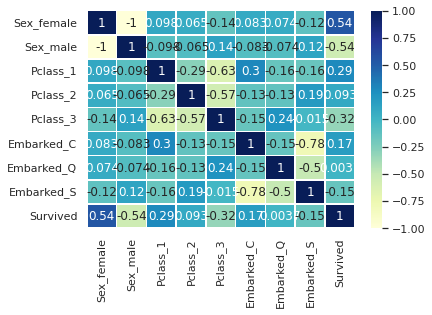

In [18]:
crosscheck_columns = [col_name for col_name in one_hot_df.columns.tolist()
                      if col_name.split("_")[0] in temp_columns and "_" in col_name] + ["Sex"]

# temp 열
temp_df = pd.merge(one_hot_df[crosscheck_columns], y_true,
                   left_index = True, right_index = True)

corr = temp_df.corr() # 상관 함수
sns.set()
ax = sns.heatmap(corr, annot = True, linewidths = .5, cmap = "YlGnBu")
